<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/multivariateNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

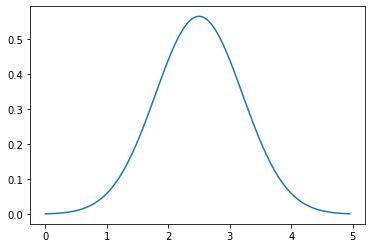

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import numpy as np
from scipy.stats import multivariate_normal as mn

x = np.linspace(0, 5, 100, endpoint=False)
y = mn.pdf(x, mean=2.5, cov=0.5); y
plt.plot(x, y)

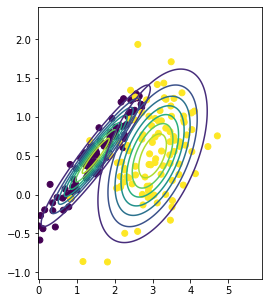

In [0]:
mu1 = np.array([1.5,0.5])
cov1 = np.array([[0.5, 0.3],[0.3,0.2]])
N1 = 100
pdf1 = mn(mu1, cov1)

mu2 = np.array([3,0.5])
cov2 = np.array([[0.5, 0.2],[0.2,0.3]])
N2 = 100
pdf2 = mn(mu2, cov2)

X = np.r_[pdf1.rvs(size=N1),pdf2.rvs(size=N2)]
y = np.r_[-1.0*np.ones((N1,1)),np.ones((N2,1))]



xx, yy = np.mgrid[1.25*min(X[:,0]):1.25*max(X[:,0]):.01, 1.25*min(X[:,1]):1.25*max(X[:,1]):.01]
pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy



plt.figure(figsize=(4,5))
plt.scatter(X[:,0],X[:,1], c=y)
plt.contour(xx, yy, pdf1.pdf(pos))
plt.contour(xx, yy, pdf2.pdf(pos))
plt.show()


In [0]:
x.shape + (2,)

In [0]:
pdf1.pdf(mu1)

1.5915494309189526

In [0]:
mu1 = np.array([0.2,0.5])
cov1 = np.array([[0.5, 0.3],[-0.3,0.2]])
N1 = 100
rv1 = mn(mu1, cov1)

In [0]:
rv1.rvs(size=100)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


array([[-1.26426119e-01, -8.79209095e-01],
       [-2.08342256e-01, -1.22250580e-01],
       [ 2.55590467e-02,  5.55975462e-01],
       [-1.07194126e+00, -1.33604027e-02],
       [-4.15837088e-01,  2.32670197e-01],
       [ 2.38923749e-01,  9.89517912e-01],
       [ 1.36213335e+00,  2.35876721e-01],
       [-1.23487521e-01,  7.61962062e-01],
       [ 7.03511720e-01,  2.02140182e+00],
       [ 9.08201290e-01,  2.32190301e-01],
       [ 1.00657407e+00,  2.79101886e-01],
       [-7.38025270e-01, -4.24986836e-01],
       [-9.24888902e-01, -7.82419718e-01],
       [ 1.08105066e+00, -6.31476422e-01],
       [ 5.11630031e-01,  1.21559751e+00],
       [ 5.24595388e-02,  9.49035203e-01],
       [ 1.00816228e+00,  2.98402742e-01],
       [-1.45924366e+00, -7.05114518e-01],
       [ 2.62431496e-01,  9.54489146e-01],
       [ 4.35747597e-01, -4.20506866e-01],
       [ 7.52804984e-01,  1.02330808e+00],
       [-6.12653974e-01,  1.00284130e+00],
       [-4.48325460e-01,  8.54322414e-01],
       [-2.

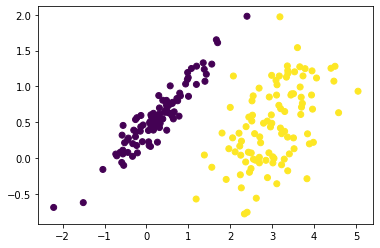

In [0]:
ye = np.c_[pdf1.pdf(X),pdf2.pdf(X)]

plt.scatter(X[:,0],X[:,1],c=ye.argmax(axis=1))

(908, 345, 2)


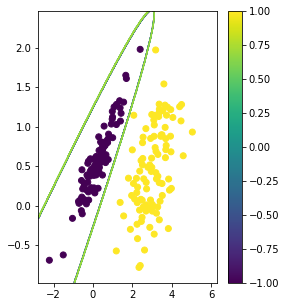

In [0]:
dc1 = pdf1.pdf(pos)
dc2 = pdf2.pdf(pos)
pb = np.zeros((dc1.shape[0],dc2.shape[1],2))
pb[:,:,0] = dc1
pb[:,:,1] = dc2
print(pb.shape)
plt.figure(figsize=(4,5))
plt.contour(xx, yy,pb.argmax(axis=2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.colorbar()

In [0]:
pdf2.pdf(pos).shape

(845, 354)